In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
headers = {
    "accept":"text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7",
    "accept-encoding":"gzip, deflate, br, zstd",
    "accept-language":"en-US,en;q=0.9,en-IN;q=0.8",
    "cache-control":"no-cache",
    "pragma":"no-cache",
    "priority":"u=0, i",
    "sec-ch-ua":'"Not A(Brand";v="8", "Chromium";v="132", "Microsoft Edge";v="132"',
    "sec-ch-ua-mobile":"?0",
    "sec-ch-ua-platform":"Windows",
    "sec-fetch-dest":"document",
    "sec-fetch-mode":"navigate",
    "sec-fetch-site":"same-origin",
    "sec-fetch-user":"?1",
    "upgrade-insecure-requests":"1",
    "user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/132.0.0.0 Safari/537.36 Edg/132.0.0.0"
}

In [3]:
url =  "https://www.ambitionbox.com/list-of-companies?campaign=desktop_nav&page=1"

In [4]:
webpage = requests.get(url , headers= headers)

In [5]:
webpage

<Response [200]>

In [6]:
soup = BeautifulSoup(webpage.content, "html.parser")

<!DOCTYPE html>

<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-n-head-ssr="" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width,initial-scale=1,minimum-scale=1" name="viewport"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<link href="/assets/next/manifest.json" rel="manifest"/>
<style>@media only screen and (min-width:767px){.trp-img{width:400px!important;max-width:400px!important}}</style>
<script src="/static/js/env-runtime.js"></script>
<script>window.dataLayer=window.dataLayer||[],window.gtag=window.gtag||function(){window.dataLayer.push(arguments)},gtag("js",new Date),window.initialDate=(new Date).toISOString()</script>
<title>Companies in India | AmbitionBox</title><meta content="2025 AmbitionBox" data-n-head="ssr" name="copyright"/><meta content="1 day" data-n-head="ssr" name="revisit-after"/><meta content="AmbitionBox" data-n-head="ssr" name="application-name"/><meta content="EN" data-n-head="ssr" name="content-language"
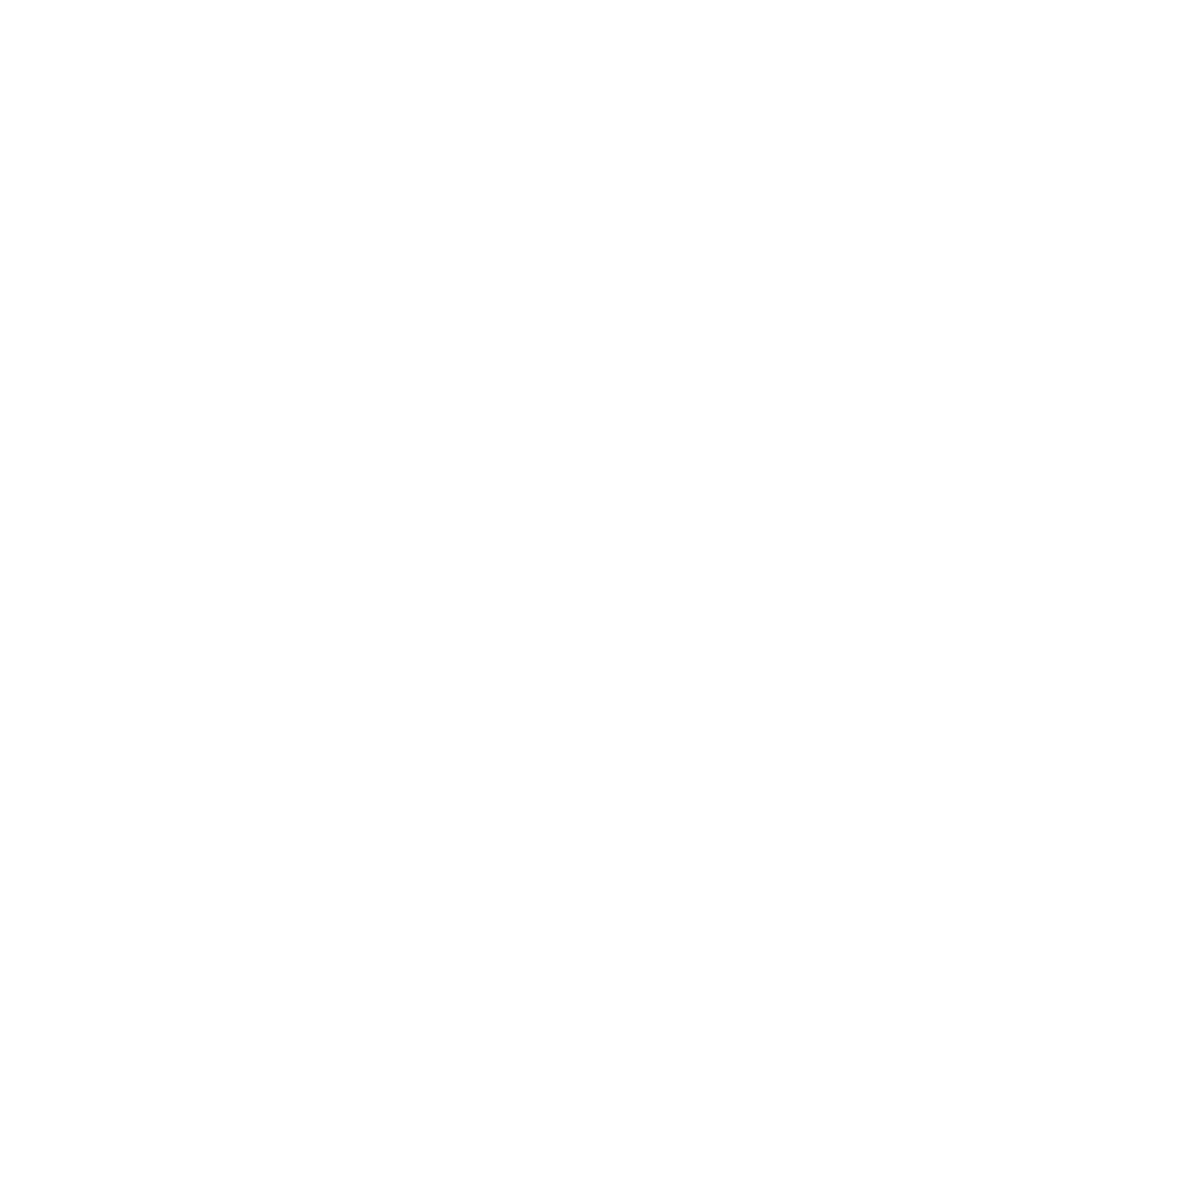

In [7]:
soup

In [9]:
soup.find_all("h1")[0].text.strip()

'Companies in India'

In [10]:
for i  in soup.find_all("h2"):
    print(i.text.strip())


TCS
Accenture
Wipro
Cognizant
Capgemini
HDFC Bank
Infosys
ICICI Bank
HCLTech
Tech Mahindra
Genpact
Teleperformance
Concentrix Corporation
Axis Bank
Amazon
Jio
Reliance Retail
iEnergizer
IBM
LTIMindtree
Companies by Industry
Companies by Locations
Companies by Type


In [11]:
for i in soup.find_all("div",class_="rating_star_container"):
    print(i.text.strip())
     

3.7
3.9
3.7
3.8
3.8
3.9
3.7
4.0
3.5
3.6
3.9
3.9
3.8
3.8
4.1
3.9
3.9
4.7
4.1
3.8


In [12]:
for i in soup.find_all("span", class_="companyCardWrapper__companyRatingCount"):
    print(i.text.strip().strip('()'))
     


85.8k
53.7k
51k
48k
39.7k
38.1k
37.3k
37.1k
34.5k
33.7k
30.3k
28.1k
25.4k
24.6k
24.3k
21.9k
21.6k
21.5k
21.4k
20.1k


In [13]:
for i in soup.find_all("span",class_="companyCardWrapper__interLinking"):
    print(i.text.strip())

IT Services & Consulting | Bangalore / Bengaluru +377 other locations
IT Services & Consulting | Bangalore / Bengaluru +193 other locations
IT Services & Consulting | Bangalore / Bengaluru +340 other locations
IT Services & Consulting | Chennai +192 other locations
IT Services & Consulting | Bangalore / Bengaluru +158 other locations
Banking | Mumbai +1626 other locations
IT Services & Consulting | Bangalore / Bengaluru +199 other locations
Banking | Mumbai +1334 other locations
IT Services & Consulting | Chennai +200 other locations
IT Services & Consulting | Hyderabad / Secunderabad +285 other locations
IT Services & Consulting | Hyderabad / Secunderabad +133 other locations
BPO | Mumbai +206 other locations
BPO | Bangalore / Bengaluru +138 other locations
Banking | Mumbai +1358 other locations
Internet | Bangalore / Bengaluru +459 other locations
Mumbai +1202 other locations
Retail | Mumbai +1044 other locations
BPO | Noida +39 other locations
IT Services & Consulting | Bangalore / 

In [39]:
company = soup.find_all('div',class_='companyCardWrapper')

In [150]:
name = []
rating = []
reviews = []
ctypes = []
locations = []
Advantage = []
dis = []

for i in company:
    # Extract company name
    name.append(i.find('h2').text.strip())
    
    # Extract rating
    rating.append(i.find("div", class_="rating_star_container").text.strip())
    
    # Extract reviews
    reviews.append(i.find("span", class_="companyCardWrapper__companyRatingCount").text.strip().strip('()'))
    
    # Extract company type and location
    inter_linking = i.find("span", class_="companyCardWrapper__interLinking")
    if inter_linking:
        text = inter_linking.text.strip()
        if "|" in text:
            company_type, location = text.split("|", 1)
            ctypes.append(company_type.strip())
            locations.append(location.strip())
        else:
            ctypes.append(text.strip())
            locations.append("Unknown")
    else:
        ctypes.append("Unknown")
        locations.append("Unknown")
    
    # Extract "Highly Rated For" and "Critically Rated For"
    ratings = i.find_all("div", class_="companyCardWrapper__ratingHeader")
    highly_rated_text, critically_rated_text = "None", "None"
    
    for rating_section in ratings:
        header_text = rating_section.text.strip()
        rating_values = rating_section.find_next("span", class_="companyCardWrapper__ratingValues")
        
        if "Highly Rated For" in header_text and rating_values:
            highly_rated_text = rating_values.text.strip()
        elif "Critically Rated For" in header_text and rating_values:
            critically_rated_text = rating_values.text.strip()
    
    Advantage.append(highly_rated_text)
    dis.append(critically_rated_text)

# Create DataFrame
import pandas as pd

df = pd.DataFrame({
    "Name": name,
    "Rating": rating,
    "Reviews": reviews,
    "Company Type": ctypes,
    "Location": locations,
    "Highly Rated For": Advantage,
    "Critically Rated For": dis
})

# Display the DataFrame
print(df)


                      Name Rating Reviews                  Company Type  \
0                      TCS    3.7   85.8k      IT Services & Consulting   
1                Accenture    3.9   53.7k      IT Services & Consulting   
2                    Wipro    3.7     51k      IT Services & Consulting   
3                Cognizant    3.8     48k      IT Services & Consulting   
4                Capgemini    3.8   39.7k      IT Services & Consulting   
5                HDFC Bank    3.9   38.1k                       Banking   
6                  Infosys    3.7   37.3k      IT Services & Consulting   
7               ICICI Bank    4.0   37.1k                       Banking   
8                  HCLTech    3.5   34.5k      IT Services & Consulting   
9            Tech Mahindra    3.6   33.7k      IT Services & Consulting   
10                 Genpact    3.9   30.3k      IT Services & Consulting   
11         Teleperformance    3.9   28.1k                           BPO   
12  Concentrix Corporatio

In [174]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

final = pd.DataFrame()
j = 1
while j <= 500:
    webpage = requests.get("https://www.ambitionbox.com/list-of-companies?campaign=desktop_nav&page={}".format(j), headers=headers)
    j += 1
    soup = BeautifulSoup(webpage.content, "html.parser")
    company = soup.find_all("div", class_="companyCardWrapper")  # You need to define this based on the actual structure of the page

    # Initialize lists before each iteration
    name = []
    rating = []
    reviews = []
    ctypes = []
    locations = []
    Advantage = []
    dis = []

    for i in company:
        # Extract company name
        name.append(i.find('h2').text.strip())

        # Extract rating
        rating.append(i.find("div", class_="rating_star_container").text.strip())

        # Extract reviews
        review_element = i.find("span", class_="companyCardWrapper__companyRatingCount")
        if review_element:
            reviews.append(review_element.text.strip().strip('()'))
        else:
            reviews.append("No reviews")

        # Extract company type and location
        inter_linking = i.find("span", class_="companyCardWrapper__interLinking")
        if inter_linking:
            text = inter_linking.text.strip()
            if "|" in text:
                company_type, location = text.split("|", 1)
                ctypes.append(company_type.strip())
                locations.append(location.strip())
            else:
                ctypes.append(text.strip())
                locations.append("Unknown")
        else:
            ctypes.append("Unknown")
            locations.append("Unknown")

        # Extract "Highly Rated For" and "Critically Rated For"
        ratings = i.find_all("div", class_="companyCardWrapper__ratingHeader")
        highly_rated_text, critically_rated_text = "None", "None"

        for rating_section in ratings:
            header_text = rating_section.text.strip()
            rating_values = rating_section.find_next("span", class_="companyCardWrapper__ratingValues")

            if "Highly Rated For" in header_text and rating_values:
                highly_rated_text = rating_values.text.strip()
            elif "Critically Rated For" in header_text and rating_values:
                critically_rated_text = rating_values.text.strip()

        Advantage.append(highly_rated_text)
        dis.append(critically_rated_text)

    # Create DataFrame
    df = pd.DataFrame({
        "Name": name,
        "Rating": rating,
        "Reviews": reviews,
        "Company Type": ctypes,
        "Location": locations,
        "Highly Rated For": Advantage,
        "Critically Rated For": dis
    })

    # Concatenate without duplicates (drop_duplicates can also be used here if necessary)
    final = pd.concat([final, df], ignore_index=True).drop_duplicates()

# Now `final` will have unique rows.


In [175]:
final.to_csv('DS_Project.csv',index=False)